In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

file_path = "Disease_symptom_and_patient_profile_dataset.csv"
df = pd.read_csv(file_path)

# Identify target variable and the categorical variables 
categorical_cols = ['Fever', 'Cough', 'Fatigue', 'Difficulty Breathing', 'Gender', 'Blood Pressure', 'Cholesterol Level', 'Disease']
target_col = 'Outcome Variable'

# Encoding target variable and the categorical variables
encoder = OneHotEncoder(drop='first')
ct = ColumnTransformer([('encoder', encoder, categorical_cols)], remainder='passthrough')
pipeline = Pipeline(steps=[('preprocessor', ct)])
X_encoded = pipeline.fit_transform(df.drop(columns=[target_col]))
y_encoded = df[target_col].map({'Positive': 1, 'Negative': 0})

# Spliting this data into two sets- training and testing
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42)

# Selection and Training of model (Random Forest)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Evaluation of the model
y_pred = model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.87      0.79        30
           1       0.88      0.75      0.81        40

    accuracy                           0.80        70
   macro avg       0.80      0.81      0.80        70
weighted avg       0.81      0.80      0.80        70



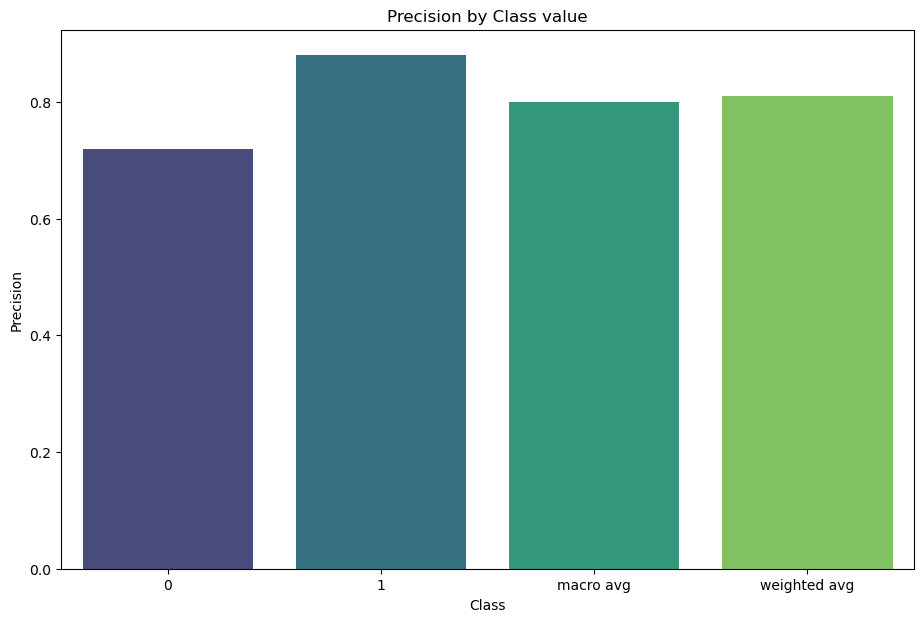

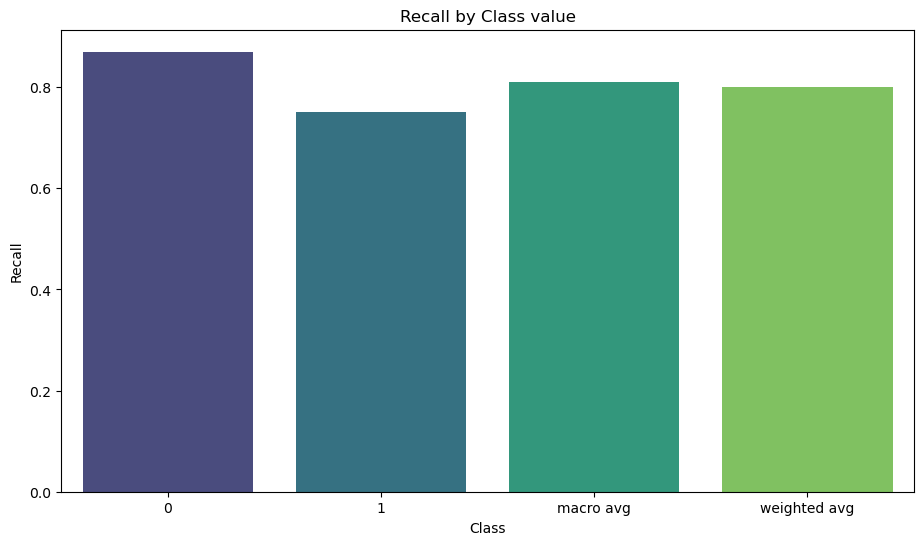

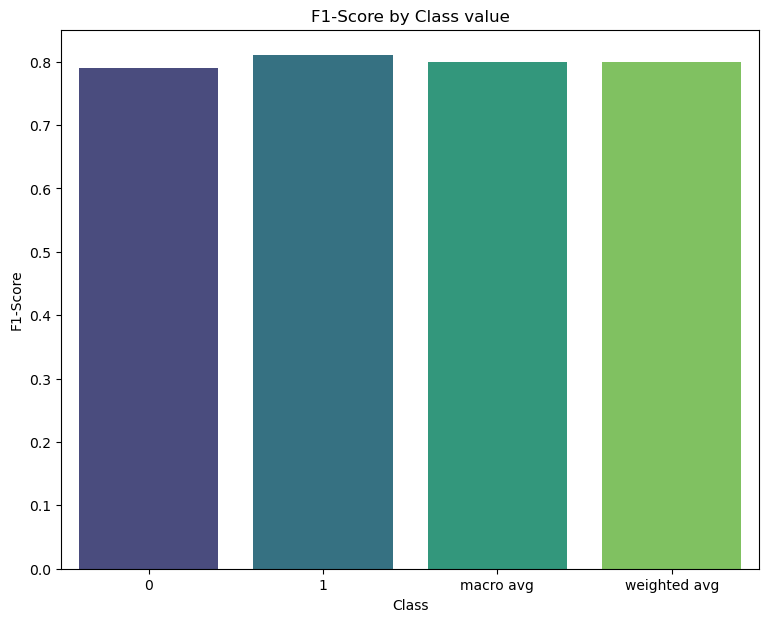

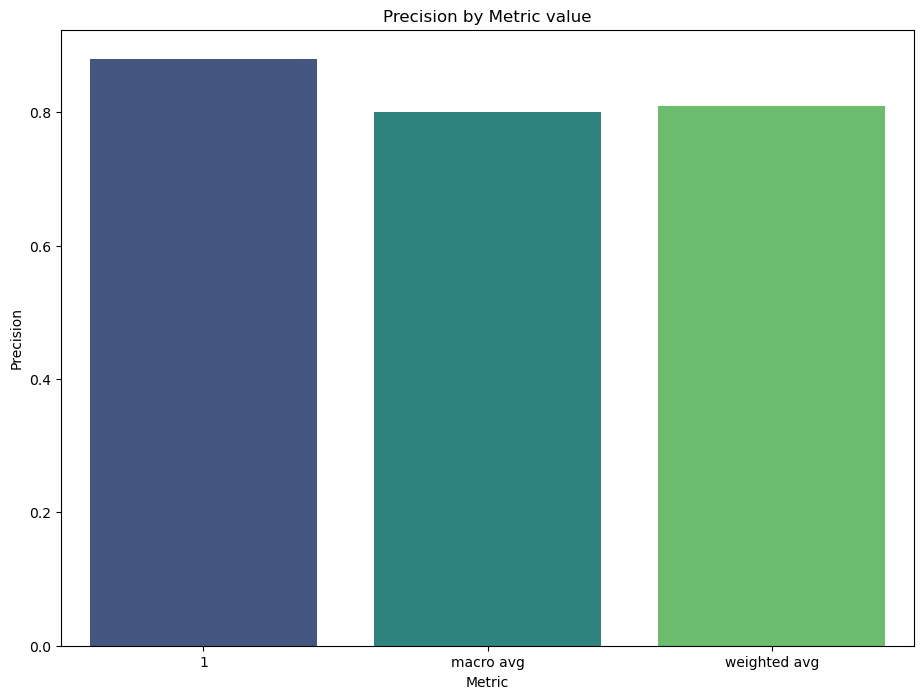

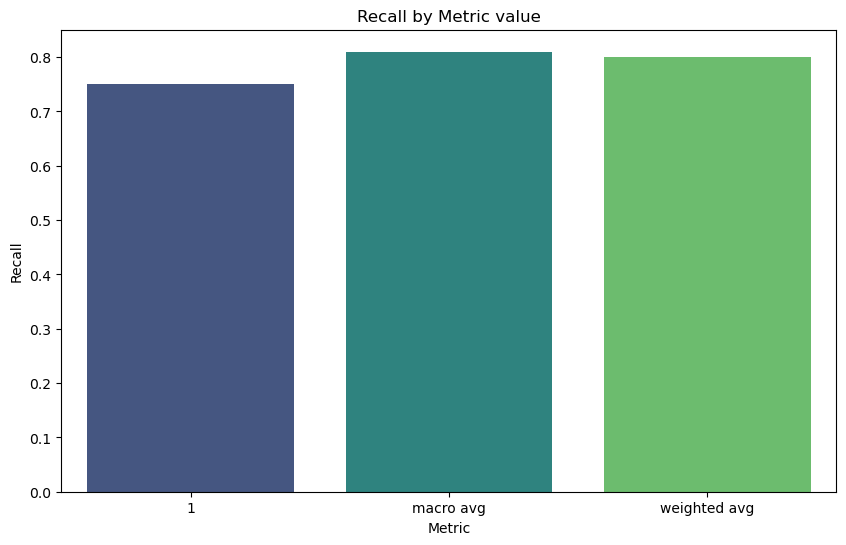

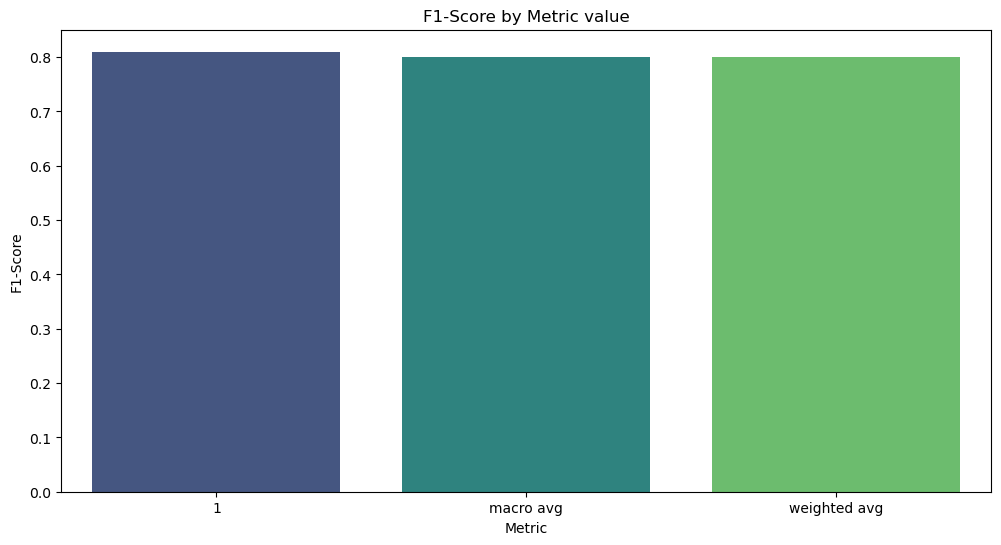

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report

# using the classification report data
report_data = {
    "class": [0, 1, "macro avg", "weighted avg"],
    "precision": [0.72, 0.88, 0.80, 0.81],
    "recall": [0.87, 0.75, 0.81, 0.80],
    "f1-score": [0.79, 0.81, 0.80, 0.80],
    "support": [30, 40, 70, 70]
}

report_df = pd.DataFrame(report_data)

# For each class plotting the precision, recall, and f1-score 
plt.figure(figsize=(11, 7))
sns.barplot(x='class', y='precision', data=report_df, palette='viridis')
plt.title('Precision by Class value')
plt.xlabel('Class')
plt.ylabel('Precision')
plt.show()

plt.figure(figsize=(11, 6))
sns.barplot(x='class', y='recall', data=report_df, palette='viridis')
plt.title('Recall by Class value')
plt.xlabel('Class')
plt.ylabel('Recall')
plt.show()

plt.figure(figsize=(9, 7))
sns.barplot(x='class', y='f1-score', data=report_df, palette='viridis')
plt.title('F1-Score by Class value')
plt.xlabel('Class')
plt.ylabel('F1-Score')
plt.show()

# Plotting the  accuracy, macro avg, and weighted avg data
metrics_df = report_df.iloc[-3:, :]

plt.figure(figsize=(11, 8))
sns.barplot(x='class', y='precision', data=metrics_df, palette='viridis')
plt.title('Precision by Metric value')
plt.xlabel('Metric')
plt.ylabel('Precision')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='class', y='recall', data=metrics_df, palette='viridis')
plt.title('Recall by Metric value')
plt.xlabel('Metric')
plt.ylabel('Recall')
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='class', y='f1-score', data=metrics_df, palette='viridis')
plt.title('F1-Score by Metric value')
plt.xlabel('Metric')
plt.ylabel('F1-Score')
plt.show()
